# Examen práctico

## Itzel Yacquelin Beltran Reyes - A00832700

### Problema 2

Primero se cargan todas las librerías que considero serán necesarias para el análisis y le voy agregando conforme las voy necesitando

In [1]:
import pandas as pd
import numpy as np
import kmapper as km
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kmapper.jupyter import display
import sklearn
from sklearn.decomposition import PCA

Ahora se lee la base de datos

In [2]:
data = pd.read_csv('wine-clustering.csv')
data.head(8)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295


Revisamos si tiene nulos para ver si es necesario hacer alguna limpieza de datos.

In [3]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Se realiza un PCA para reducir la dimensionalidad de los datos y trabajar de una mejor manera la información sin que se pierda información

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
datos_proyectados_pca = pca.fit_transform(data)

Se realiza el análisis topológico de los datos anteriores en una dimensión

In [5]:
mapper = km.KeplerMapper(verbose=2)
projected_data = mapper.fit_transform(datos_proyectados_pca, projection=[1] )

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: [1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (178, 2)

..Projecting data using: [1]

..Scaling with: MinMaxScaler()



Se genera un resumen de la información anterior pero se utilizará para lo que serán los colores

In [6]:
mean_outer_score=(datos_proyectados_pca[:,0]+datos_proyectados_pca[:,1])/2.0

Se genera una capa con 8 cubos después de prueba y error considero que es muy representativo

In [7]:
covering = km.Cover(n_cubes=8, perc_overlap=0.5)

Se calcula la cantidad óptima de clusters en esta base de datos

El codo se encuentra en k=4


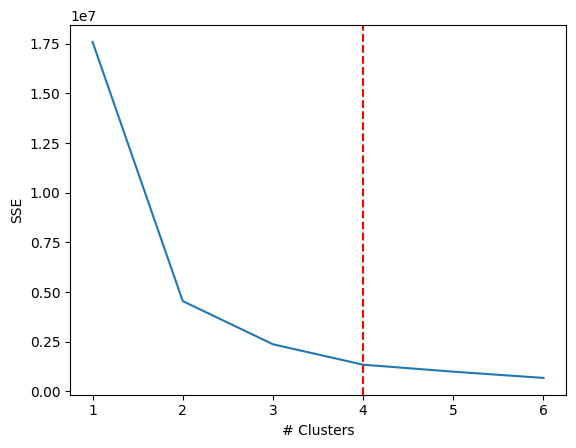

In [8]:
sse = []
max=7
for k in range(1, max):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

diff = np.diff(sse)
diff_ratio = diff / sse[:-1]
inflection_idx = np.argmax(diff_ratio) + 1

print(f'El codo se encuentra en k={inflection_idx}')
plt.plot(range(1, max), sse)
plt.xticks(range(1, max))
plt.xlabel("# Clusters")
plt.ylabel("SSE")
plt.axvline(x=inflection_idx, color='r', linestyle='--')
plt.show()

Se hace el mapeo con toda la información anterior

In [9]:
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.KMeans(n_clusters=int(inflection_idx)),cover=covering)

Mapping on data shaped (178, 13) using lens shaped (178, 1)

Minimal points in hypercube before clustering: 4
Creating 8 hypercubes.
   > Found 4 clusters in hypercube 0.
   > Found 4 clusters in hypercube 1.
   > Found 4 clusters in hypercube 2.
   > Found 4 clusters in hypercube 3.
   > Found 4 clusters in hypercube 4.
   > Found 4 clusters in hypercube 5.
   > Found 4 clusters in hypercube 6.
Cube_7 is empty.


Created 33 edges and 28 nodes in 0:00:00.010370.


Se crea una visualización en un html en la que podemos ver como se comprota por mínimo, promedio y desviación estándar. Se ven los nodos claramente y como estos se conectan entre sí.

In [10]:
mapper.visualize(G, title='Relación entre vinos', color_values = mean_outer_score, color_function_name = 'Media datos proyectados', 
                 node_color_function=np.array(['average','std','min']))

km.jupyter.display("proyectados" + ".html")

Wrote visualization to: mapper_visualization_output.html


/Users/yacquibeltran/Library/Python/3.11/lib/python/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Vemos los valores que estrán dentro de cada cluster

In [11]:
G['nodes']

defaultdict(list,
            {'cube0_cluster0': [13, 41, 50],
             'cube0_cluster1': [66,
              67,
              81,
              82,
              88,
              89,
              90,
              92,
              104,
              106,
              118,
              129,
              134,
              146,
              147],
             'cube0_cluster2': [14],
             'cube0_cluster3': [6, 11, 12, 26, 27, 51],
             'cube1_cluster0': [59,
              63,
              66,
              67,
              71,
              72,
              76,
              80,
              83,
              84,
              86,
              90,
              91,
              92,
              93,
              97,
              99,
              103,
              105,
              106,
              107,
              111,
              113,
              114,
              115,
              116,
              118,
              123,
              1

Graficamos lo 3 nodos que se encuentran en el centro de lo visualizado en el html

/var/folders/0n/92mz65hj527d4cmt71d5s0q00000gn/T/ipykernel_45339/2150172117.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(cube2_cluster2['Alcohol'], cube2_cluster2['Malic_Acid'], cube2_cluster2['Total_Phenols'], s=20, cmap='viridis')


Text(0.5, 0, 'Total_Phenols')

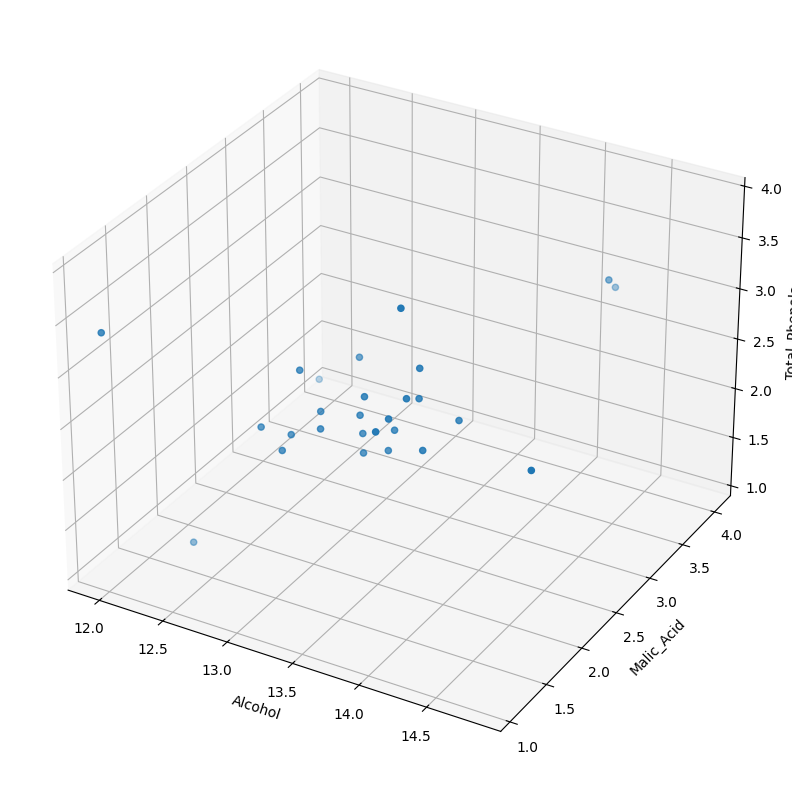

In [17]:
cube2_cluster2=data.loc[G['nodes']['cube2_cluster2']]
x_1 = cube2_cluster2['Alcohol'].values
x_2 = cube2_cluster2['Malic_Acid'].values
x_3 = cube2_cluster2['Total_Phenols'].values

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cube2_cluster2['Alcohol'], cube2_cluster2['Malic_Acid'], cube2_cluster2['Total_Phenols'], s=20, cmap='viridis')

ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic_Acid')
ax.set_zlabel('Total_Phenols')

/var/folders/0n/92mz65hj527d4cmt71d5s0q00000gn/T/ipykernel_45339/2579520287.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(cube3_cluster2['Alcohol'], cube3_cluster2['Malic_Acid'], cube3_cluster2['Total_Phenols'], s=20, cmap='viridis')


Text(0.5, 0, 'Total_Phenols')

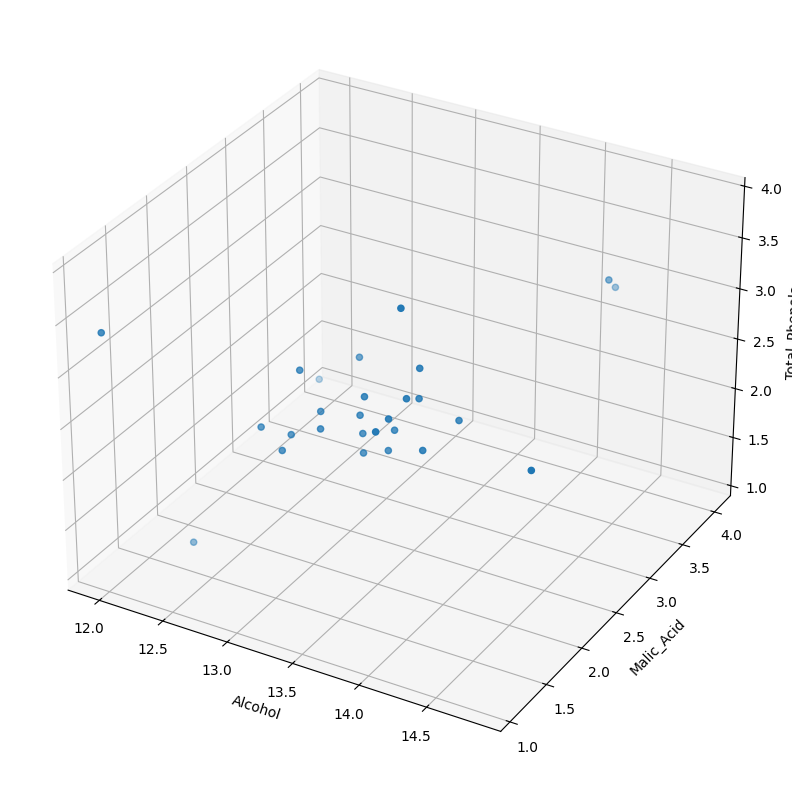

In [16]:
cube3_cluster2=data.loc[G['nodes']['cube2_cluster2']]
x_1 = cube3_cluster2['Alcohol'].values
x_2 = cube3_cluster2['Malic_Acid'].values
x_3 = cube3_cluster2['Total_Phenols'].values

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cube3_cluster2['Alcohol'], cube3_cluster2['Malic_Acid'], cube3_cluster2['Total_Phenols'], s=20, cmap='viridis')

ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic_Acid')
ax.set_zlabel('Total_Phenols')

Vemos que se parecen bastante lo que demuestra que si hay relación entre la calidad con las características que tiene el vino, es decir, este balance

Tambien notamos que es un poco más algo el alcohol y el acido que la cantidad de sabores y texturas que tiene.

Hacemos un KMeans para probar que lo hecho anteriormente tiene sentido y para esto tomamos como variables principales el alcohol, Malic_Acid (ácido que se encuentra en las frutas que se usan para hacer el vino), Total_Phenols (características sensoriales como sabor, aroma, color, astringencia, entre otras) ya que estas son las características que más impactan en si un vino es de calidad o no.

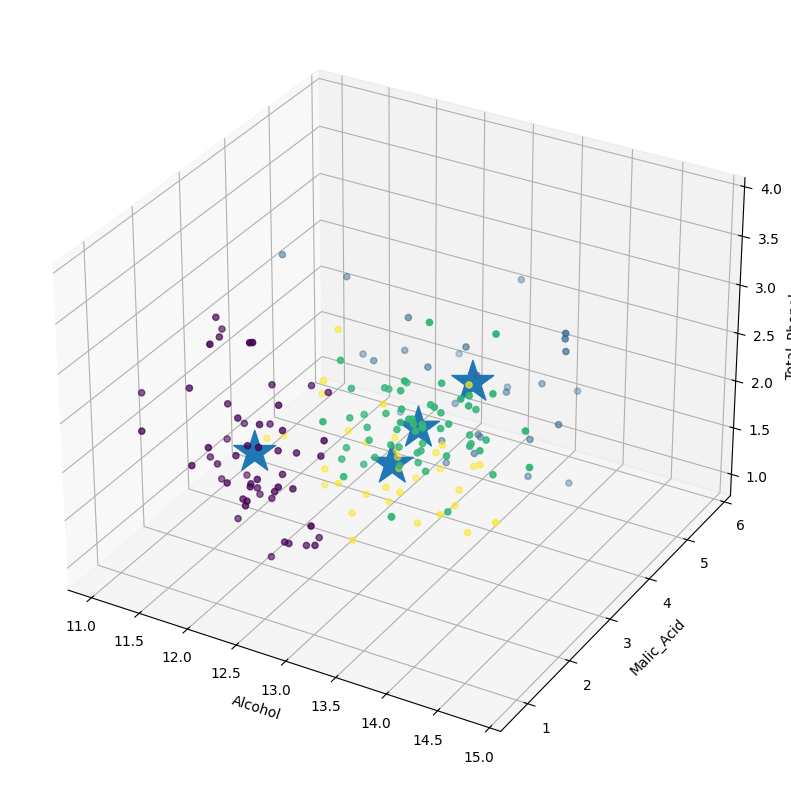

In [14]:
# Load the data
performance_data = pd.read_csv('wine-clustering.csv')

# Extract the scores and assign them to x_1, x_2, x_3
x_1 = performance_data['Alcohol'].values
x_2 = performance_data['Malic_Acid'].values
x_3 = performance_data['Total_Phenols'].values

# Reshape the data to fit
x_1 = x_1.reshape(-1, 1)
x_2 = x_2.reshape(-1, 1)
x_3 = x_3.reshape(-1, 1)
Xtot= np.concatenate((x_1, x_2, x_3), axis=1)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(Xtot)

# Get the cluster labels
labels = kmeans.labels_
centroids=kmeans.cluster_centers_

# Create a scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xtot[:, 0], Xtot[:, 1], Xtot[:, 2], c=labels, s=20, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=1000, alpha=1, marker='*')

# Add labels to the axes
ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic_Acid')
ax.set_zlabel('Total_Phenols')

# Show the plot
plt.show()

Podemos ver que estos se acumulan por el mismo espacio que los clusters anteriores, por lo que se comprueba lo antes mencionado.